In [8]:
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [9]:
import pickle
train_data_file = "./data/mnist.pkl"
with open(train_data_file, "rb") as f:
    data = pickle.load(f)

train_data, test_data = torch.Tensor(data["train"]), torch.Tensor(data["test"])

In [10]:
class Discriminator(nn.Module):
    def __init__(self, in_shape, hidden_size):
        super(Discriminator, self).__init__()
        self.in_shape = in_shape
        self.nin = np.prod(in_shape)
        self.hidden_size = hidden_size

        self.disc = nn.Sequential(nn.Linear(self.nin, self.hidden_size), nn.LeakyReLU(0.1), nn.Linear(self.hidden_size, 1), nn.Sigmoid())
    def forward(self, X):
        return self.disc(X)

class Generator(nn.Module):
    def __init__(self, in_shape, hidden_size, latent_dim, device):
        super(Generator, self).__init__()
        self.in_shape = in_shape
        self.hidden_size = hidden_size
        self.nin = np.prod(in_shape)
        self.latent_dim = latent_dim
        self.device = device

        self.gen = nn.Sequential(nn.Linear(self.latent_dim, self.hidden_size), nn.LeakyReLU(0.1), nn.Linear(self.hidden_size, self.nin), nn.Tanh())
    def forward(self ):
        X = torch.randn(32,self.latent_dim)
        X = X.to(device=self.device)
        return self.gen(X)

# class GAN(nn.Module):
#     def __init__(self, in_shape, hidden_size, latent_dim):
#         super(GAN, self).__init__()
#         self.in_shape = in_shape
#         self.hidden_size = hidden_size
#         self.latent_dim = latent_dim

#         self.gen = Generator(self.in_shape, self.hidden_size, self.latent_dim)
#         self.disc = Generator(self.in_shape, self.hidden_size, self.latent_dim)

#     def forward(self):
#         X = torch.randn(self.latent_dim)

#         generated = self.gen(X)

#         out = self.disc(generated)

#         return out

        

In [11]:
from random import random


num_epochs = 100
rec_loss = nn.MSELoss()
device = "cuda" if torch.cuda.is_available() else "mps" if (torch.backends.mps.is_available() and torch.backends.mps.is_built()) else  "cpu"
disc = Discriminator((28,28,1), 256).to(device)
gen = Generator((28,28,1), 256, 64, device).to(device)

optim_disc = torch.optim.Adam(disc.parameters(), lr=3e-4)
optim_gen = torch.optim.Adam(gen.parameters(), lr=3e-4)
loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
loss_fn = nn.BCELoss()
k_steps_disc = 4
batch_size = 32
losses = []
for ep in range(num_epochs):
    print(f"Starting epoch {ep}")
    for src in tqdm(loader):
        src[src > 0] = 1.
        src = src.to(device)
        optim_disc.zero_grad()
        optim_gen.zero_grad()
        real = src.view(src.shape[0], -1)
        # print("REAL: ",real.shape)
        fake = gen()
        # print("FAKE: ", fake.shape)


        real_preds = disc(real)
        fake_preds = disc(fake)

        disc_loss_real = loss_fn(real_preds, torch.ones_like(real_preds))
        disc_loss_fake = loss_fn(fake_preds, torch.zeros_like(fake_preds))

        disc_loss = (disc_loss_fake + disc_loss_real) / 2
        disc_loss.backward(retain_graph=True)
        optim_disc.step()


        out = disc(fake)
        loss_gen = loss_fn(out, torch.ones_like(out))
        loss_gen.backward()
        optim_gen.step()






Starting epoch 0


100%|██████████| 1875/1875 [00:25<00:00, 74.28it/s]


Starting epoch 1


100%|██████████| 1875/1875 [00:24<00:00, 75.00it/s]


Starting epoch 2


100%|██████████| 1875/1875 [00:24<00:00, 75.59it/s]


Starting epoch 3


100%|██████████| 1875/1875 [00:24<00:00, 77.07it/s]


Starting epoch 4


100%|██████████| 1875/1875 [00:24<00:00, 76.92it/s]


Starting epoch 5


100%|██████████| 1875/1875 [00:24<00:00, 76.83it/s]


Starting epoch 6


100%|██████████| 1875/1875 [00:24<00:00, 76.96it/s]


Starting epoch 7


100%|██████████| 1875/1875 [00:24<00:00, 76.83it/s]


Starting epoch 8


100%|██████████| 1875/1875 [00:24<00:00, 76.90it/s]


Starting epoch 9


100%|██████████| 1875/1875 [00:24<00:00, 76.92it/s]


Starting epoch 10


100%|██████████| 1875/1875 [00:24<00:00, 76.97it/s]


Starting epoch 11


100%|██████████| 1875/1875 [00:24<00:00, 77.04it/s]


Starting epoch 12


100%|██████████| 1875/1875 [00:24<00:00, 76.93it/s]


Starting epoch 13


100%|██████████| 1875/1875 [00:24<00:00, 76.98it/s]


Starting epoch 14


100%|██████████| 1875/1875 [00:24<00:00, 77.14it/s]


Starting epoch 15


100%|██████████| 1875/1875 [00:24<00:00, 77.35it/s]


Starting epoch 16


100%|██████████| 1875/1875 [00:24<00:00, 77.09it/s]


Starting epoch 17


100%|██████████| 1875/1875 [00:24<00:00, 77.11it/s]


Starting epoch 18


100%|██████████| 1875/1875 [00:24<00:00, 77.27it/s]


Starting epoch 19


100%|██████████| 1875/1875 [00:24<00:00, 77.56it/s]


Starting epoch 20


100%|██████████| 1875/1875 [00:24<00:00, 77.26it/s]


Starting epoch 21


100%|██████████| 1875/1875 [00:24<00:00, 77.21it/s]


Starting epoch 22


100%|██████████| 1875/1875 [00:24<00:00, 77.58it/s]


Starting epoch 23


100%|██████████| 1875/1875 [00:24<00:00, 77.68it/s]


Starting epoch 24


100%|██████████| 1875/1875 [00:24<00:00, 77.90it/s]


Starting epoch 25


100%|██████████| 1875/1875 [00:24<00:00, 77.84it/s]


Starting epoch 26


100%|██████████| 1875/1875 [00:24<00:00, 77.89it/s]


Starting epoch 27


100%|██████████| 1875/1875 [00:24<00:00, 78.04it/s]


Starting epoch 28


100%|██████████| 1875/1875 [00:24<00:00, 78.02it/s]


Starting epoch 29


100%|██████████| 1875/1875 [00:24<00:00, 77.97it/s]


Starting epoch 30


100%|██████████| 1875/1875 [00:24<00:00, 78.09it/s]


Starting epoch 31


100%|██████████| 1875/1875 [00:24<00:00, 78.06it/s]


Starting epoch 32


100%|██████████| 1875/1875 [00:24<00:00, 78.08it/s]


Starting epoch 33


100%|██████████| 1875/1875 [00:24<00:00, 78.10it/s]


Starting epoch 34


100%|██████████| 1875/1875 [00:24<00:00, 77.96it/s]


Starting epoch 35


100%|██████████| 1875/1875 [00:24<00:00, 78.00it/s]


Starting epoch 36


100%|██████████| 1875/1875 [00:24<00:00, 78.02it/s]


Starting epoch 37


100%|██████████| 1875/1875 [00:23<00:00, 78.24it/s]


Starting epoch 38


100%|██████████| 1875/1875 [00:23<00:00, 79.49it/s]


Starting epoch 39


100%|██████████| 1875/1875 [00:23<00:00, 79.50it/s]


Starting epoch 40


100%|██████████| 1875/1875 [00:23<00:00, 79.87it/s]


Starting epoch 41


100%|██████████| 1875/1875 [00:23<00:00, 79.35it/s]


Starting epoch 42


100%|██████████| 1875/1875 [00:23<00:00, 79.08it/s]


Starting epoch 43


100%|██████████| 1875/1875 [00:23<00:00, 79.08it/s]


Starting epoch 44


100%|██████████| 1875/1875 [00:23<00:00, 78.60it/s]


Starting epoch 45


100%|██████████| 1875/1875 [00:23<00:00, 78.54it/s]


Starting epoch 46


100%|██████████| 1875/1875 [00:23<00:00, 78.57it/s]


Starting epoch 47


100%|██████████| 1875/1875 [00:23<00:00, 78.50it/s]


Starting epoch 48


100%|██████████| 1875/1875 [00:23<00:00, 78.66it/s]


Starting epoch 49


100%|██████████| 1875/1875 [00:23<00:00, 78.63it/s]


Starting epoch 50


100%|██████████| 1875/1875 [00:23<00:00, 78.54it/s]


Starting epoch 51


100%|██████████| 1875/1875 [00:23<00:00, 78.45it/s]


Starting epoch 52


100%|██████████| 1875/1875 [00:23<00:00, 78.32it/s]


Starting epoch 53


100%|██████████| 1875/1875 [00:23<00:00, 78.32it/s]


Starting epoch 54


100%|██████████| 1875/1875 [00:23<00:00, 78.43it/s]


Starting epoch 55


100%|██████████| 1875/1875 [00:23<00:00, 78.46it/s]


Starting epoch 56


100%|██████████| 1875/1875 [00:23<00:00, 78.37it/s]


Starting epoch 57


100%|██████████| 1875/1875 [00:23<00:00, 78.49it/s]


Starting epoch 58


100%|██████████| 1875/1875 [00:23<00:00, 78.49it/s]


Starting epoch 59


100%|██████████| 1875/1875 [00:23<00:00, 78.36it/s]


Starting epoch 60


100%|██████████| 1875/1875 [00:23<00:00, 78.34it/s]


Starting epoch 61


100%|██████████| 1875/1875 [00:23<00:00, 78.30it/s]


Starting epoch 62


100%|██████████| 1875/1875 [00:23<00:00, 78.26it/s]


Starting epoch 63


100%|██████████| 1875/1875 [00:23<00:00, 78.24it/s]


Starting epoch 64


100%|██████████| 1875/1875 [00:23<00:00, 78.16it/s]


Starting epoch 65


100%|██████████| 1875/1875 [00:23<00:00, 78.51it/s]


Starting epoch 66


100%|██████████| 1875/1875 [00:23<00:00, 78.34it/s]


Starting epoch 67


100%|██████████| 1875/1875 [00:23<00:00, 78.24it/s]


Starting epoch 68


100%|██████████| 1875/1875 [00:23<00:00, 78.26it/s]


Starting epoch 69


100%|██████████| 1875/1875 [00:23<00:00, 78.21it/s]


Starting epoch 70


100%|██████████| 1875/1875 [00:23<00:00, 78.27it/s]


Starting epoch 71


100%|██████████| 1875/1875 [00:23<00:00, 78.21it/s]


Starting epoch 72


100%|██████████| 1875/1875 [00:23<00:00, 78.22it/s]


Starting epoch 73


100%|██████████| 1875/1875 [00:23<00:00, 78.36it/s]


Starting epoch 74


100%|██████████| 1875/1875 [00:23<00:00, 78.23it/s]


Starting epoch 75


100%|██████████| 1875/1875 [00:23<00:00, 78.28it/s]


Starting epoch 76


100%|██████████| 1875/1875 [00:23<00:00, 78.22it/s]


Starting epoch 77


100%|██████████| 1875/1875 [00:23<00:00, 78.28it/s]


Starting epoch 78


100%|██████████| 1875/1875 [00:24<00:00, 76.30it/s]


Starting epoch 79


100%|██████████| 1875/1875 [00:24<00:00, 75.86it/s]


Starting epoch 80


100%|██████████| 1875/1875 [00:24<00:00, 76.39it/s]


Starting epoch 81


100%|██████████| 1875/1875 [00:24<00:00, 76.16it/s]


Starting epoch 82


100%|██████████| 1875/1875 [00:24<00:00, 76.33it/s]


Starting epoch 83


100%|██████████| 1875/1875 [00:24<00:00, 76.42it/s]


Starting epoch 84


100%|██████████| 1875/1875 [00:24<00:00, 76.45it/s]


Starting epoch 85


100%|██████████| 1875/1875 [00:24<00:00, 76.53it/s]


Starting epoch 86


100%|██████████| 1875/1875 [00:24<00:00, 76.56it/s]


Starting epoch 87


100%|██████████| 1875/1875 [00:24<00:00, 76.54it/s]


Starting epoch 88


100%|██████████| 1875/1875 [00:24<00:00, 76.47it/s]


Starting epoch 89


100%|██████████| 1875/1875 [00:24<00:00, 76.61it/s]


Starting epoch 90


100%|██████████| 1875/1875 [00:24<00:00, 76.76it/s]


Starting epoch 91


100%|██████████| 1875/1875 [00:24<00:00, 76.46it/s]


Starting epoch 92


100%|██████████| 1875/1875 [00:24<00:00, 76.55it/s]


Starting epoch 93


100%|██████████| 1875/1875 [00:24<00:00, 76.51it/s]


Starting epoch 94


100%|██████████| 1875/1875 [00:24<00:00, 76.54it/s]


Starting epoch 95


100%|██████████| 1875/1875 [00:25<00:00, 73.83it/s]


Starting epoch 96


100%|██████████| 1875/1875 [00:25<00:00, 74.35it/s]


Starting epoch 97


100%|██████████| 1875/1875 [00:24<00:00, 75.95it/s]


Starting epoch 98


100%|██████████| 1875/1875 [00:25<00:00, 74.45it/s]


Starting epoch 99


100%|██████████| 1875/1875 [00:25<00:00, 74.71it/s]


In [12]:
from torchvision.utils import make_grid
def show_samples(samples, fname=None, nrow=10, title='Samples'):
    samples = (torch.FloatTensor(samples)).permute(0, 3, 1, 2)
    grid_img = make_grid(samples, nrow=nrow)
    plt.figure()
    plt.title(title)


    plt.imshow(grid_img.permute(1, 2, 0))
    plt.axis('off')

    if fname is not None:
        print("Yow")
    else:
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([32, 28, 28, 1])


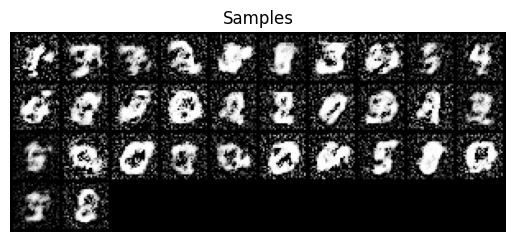

In [14]:
with torch.no_grad():
    fake = gen()
    fake = fake.reshape(32, 28,28,1).cpu()
    print(fake.shape)
    show_samples(fake)
